In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from google.colab import drive
drive.mount('/content/drive')

#reading the dataset
df=pd.read_csv("/content/data.csv")
print("\nDataSet Categorization")
print("------------------------\n")
df.info()
print("\nFirst 5 rows\n------------")
df.head()

#handling missing values
print("Missing values before handling:")
print(df.isnull().sum())
df_cleaned = df.dropna()
print("\nMissing values after handling:")
print(df.isnull().sum())
df = df.sort_values(by='Age')
print("\nSorted Data by age:")
df.head()

#cleaning the data
df_cleaned = df.dropna()
df_cleaned['Gender'].fillna(df_cleaned['Gender'].mode()[0])
le=LabelEncoder()
df_cleaned['Gender']=le.fit_transform(df_cleaned['Gender'])
df_cleaned['Interest']=le.fit_transform(df_cleaned['Interest'])
df_cleaned['Age'].fillna(df_cleaned['Age'].mean())
numerical_cols = ["Age", "Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"]
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
print("\nData after preprocessing:\n")
df_cleaned.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DataSet Categorization
------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB

First 5 rows
------------
Missing values before handling:
Age                   0
Gender                0
Educa

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
3821,-1.92842,0,0,0.244747,-0.718665,-0.364509,0.805452,0,ENFJ
3784,-1.92842,1,0,-0.748612,-1.469380,-0.150420,-0.185074,2,INFJ
27297,-1.92842,0,0,0.557260,-0.467943,-0.298271,-1.704309,0,ENTP
40024,-1.92842,1,0,0.510523,-1.094621,-1.103142,0.685052,1,ENFJ
7026,-1.92842,0,0,-0.493561,-0.951192,-0.793877,0.325989,0,INFP


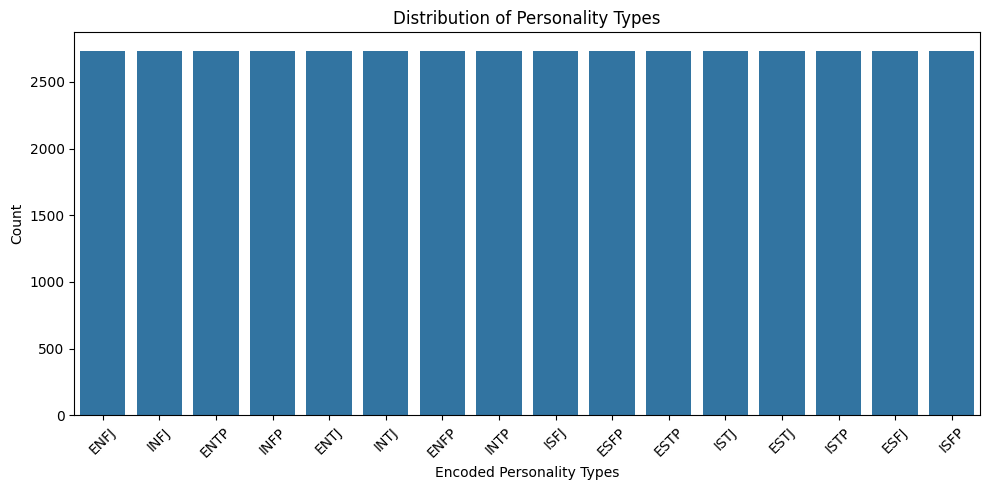

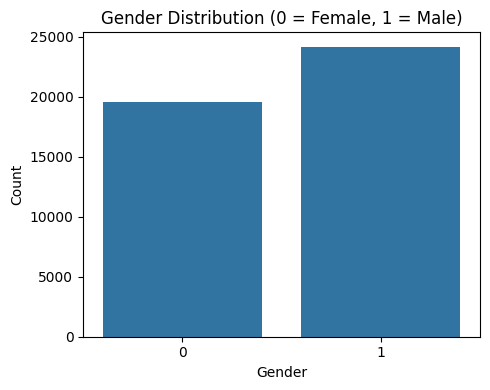

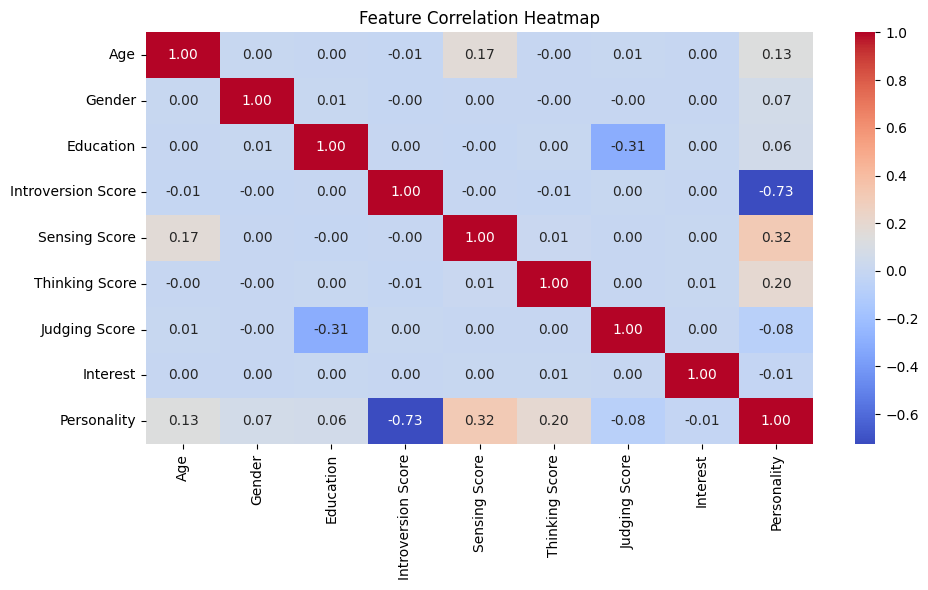

In [16]:
# === 1. Distribution of Personality Types ===
plt.figure(figsize=(10, 5))
sns.countplot(x="Personality", data=df_cleaned)
plt.title("Distribution of Personality Types")
plt.xlabel("Encoded Personality Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")

# === 2. Gender Distribution ===
plt.figure(figsize=(5, 4))
sns.countplot(x="Gender", data=df_cleaned)
plt.title("Gender Distribution (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("\n")

# === 3. Heatmap of Feature Correlations ===
df_pers=df_cleaned.copy()
df_pers["Personality"] = le.fit_transform(df_pers["Personality"])
plt.figure(figsize=(10, 6))
sns.heatmap(df_pers.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
print("\n")